In [142]:

# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS


# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# Large dataset
import dask.bag as db
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()



In [61]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in tqdm(g):
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in tqdm(parse(path)):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

paths=['reviews_Electronics_5.json.gz','reviews_Home_and_Kitchen.json.gz','reviews_Clothing_Shoes_and_Jewelry.json.gz','meta_Electronics.json.gz','meta_Home_and_Kitchen.json.gz','meta_Clothing_Shoes_and_Jewelry.json.gz']
reviews=[]
for i in paths:b
    reviews.append(getDF(i))


In [64]:
elec_review=reviews[0]
home_review=reviews[1]
clothes_review=reviews[2]
elec_meta=reviews[3]
home_meta=reviews[4]
clothes_meta=reviews[5]




In [66]:
elec=pd.merge(elec_review,elec_meta,on='asin',how='left')
home=pd.merge(home_review,home_meta,on='asin',how='left')
clothes=pd.merge(clothes_review,clothes_meta,on='asin',how='left')

In [67]:
elec = elec.rename(columns={'overall': 'Rating'})
home = home.rename(columns={'overall': 'Rating'})
clothes = clothes.rename(columns={'overall': 'Rating'})


In [68]:
all_data=pd.concat([elec,home,clothes])

In [69]:
all_data['review_text'] = all_data[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
all_data = all_data.drop(['reviewText', 'summary'], axis = 1)
all_data.head()

,Rating,asin,brand,categories,description,helpful,imUrl,price,related,reviewTime,reviewerID,reviewerName,salesRank,title,unixReviewTime,review_text
0,5.0,0528881469,NaN,"[[Electronics, GPS & Navigation, Vehicle GPS, ...","Like its award-winning predecessor, the Intell...","[0, 0]",http://ecx.images-amazon.com/images/I/51FnRkJq...,299.99,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...","06 2, 2013",AO94DHGC771SJ,amazdnu,NaN,Rand McNally 528881469 7-inch Intelliroute TND...,1370131200,Gotta have GPS! We got this GPS for my husband...
1,1.0,0528881469,NaN,"[[Electronics, GPS & Navigation, Vehicle GPS, ...","Like its award-winning predecessor, the Intell...","[12, 15]",http://ecx.images-amazon.com/images/I/51FnRkJq...,299.99,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,NaN,Rand McNally 528881469 7-inch Intelliroute TND...,1290643200,Very Disappointed I'm a professional OTR truck...
2,3.0,0528881469,NaN,"[[Electronics, GPS & Navigation, Vehicle GPS, ...","Like its award-winning predecessor, the Intell...","[43, 45]",http://ecx.images-amazon.com/images/I/51FnRkJq...,299.99,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,NaN,Rand McNally 528881469 7-inch Intelliroute TND...,1283990400,"1st impression Well, what can I say. I've had..."
3,2.0,0528881469,NaN,"[[Electronics, GPS & Navigation, Vehicle GPS, ...","Like its award-winning predecessor, the Intell...","[9, 10]",http://ecx.images-amazon.com/images/I/51FnRkJq...,299.99,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""",NaN,Rand McNally 528881469 7-inch Intelliroute TND...,1290556800,"Great grafics, POOR GPS Not going to write a l..."
4,1.0,0528881469,NaN,"[[Electronics, GPS & Navigation, Vehicle GPS, ...","Like its award-winning predecessor, the Intell...","[0, 0]",http://ecx.images-amazon.com/images/I/51FnRkJq...,299.99,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...","09 29, 2011",A24EV6RXELQZ63,Wayne Smith,NaN,Rand McNally 528881469 7-inch Intelliroute TND...,1317254400,"Major issues, only excuses for support I've ha..."


In [71]:
data_short=all_data.sample(frac=0.3, replace=False, random_state=1)


In [74]:
data_short.isnull().sum()

Rating                  0
asin                    0
brand             2101539
categories              0
description       1650166
helpful                 0
imUrl                2875
price             1203812
related            301821
reviewTime              0
reviewerID              0
reviewerName        21659
salesRank          419214
title               22294
unixReviewTime          0
review_text             0
dtype: int64

In [79]:
## Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end
##########################################


list_positive = []
list_negative = []

for help in data_short['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
data_short['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
data_short['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
data_short = data_short.drop('helpful', axis = 1)
data_short.head()

,Rating,asin,brand,categories,description,imUrl,price,related,reviewTime,reviewerID,reviewerName,salesRank,title,unixReviewTime,review_text,pos_feedback,neg_feedback
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...","02 12, 2014",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",{'Shoes': 12846},Clarks Women's Grasp Chime Loafer,1392163200,Clarks loafer Grasp chime loafer is a great sh...,0,0
162368,5.0,B00005OL41,Global,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...","High tech from tip to handle, Global knives fr...",http://ecx.images-amazon.com/images/I/41BbNAc5...,99.78,"{'also_bought': ['B000A386PS', 'B00005OL42', '...","10 7, 2011",AJNU8E5SHV6PQ,"Manuel Antonio Arce Arenales ""MAAA""",{'Kitchen & Dining': 9333},"Global G-21 - 6 1/4 inch, 16cm Flexible Boning...",1317945600,"Great quality, superb product I have become ac...",1,0
3501844,1.0,B007IDFQM4,Nostalgia Electrics,"[[Home & Kitchen, Kitchen & Dining, Small Appl...",The nostalgia electrics rim-150 electric ice c...,http://ecx.images-amazon.com/images/I/41K6plJk...,49.99,"{'also_viewed': ['B001CGW338', 'B003FA830G', '...","01 31, 2013",A1EZLMPWPOOIWT,Mark Mulligan,{'Kitchen & Dining': 210848},Nostalgia Electrics RIM-150 Electric Ice Cream...,1359590400,a terrible ice cream maker! This ice cream mak...,1,0
2552382,4.0,B004M6XUI2,NaN,"[[Clothing, Shoes & Jewelry, Men, Accessories,...",NaN,http://ecx.images-amazon.com/images/I/41ynIB6v...,12.99,"{'also_bought': ['B00JOTTZC2', 'B00D7WFKRQ', '...","12 25, 2012",AD0XGI18N5X4G,Oksana Lomidze,{'Clothing': 97},Alpine Swiss Men's Leather Bifold Wallet Remov...,1356393600,good present if you want to look fashion and n...,0,0
3859902,3.0,B007Z54O1Y,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN,http://ecx.images-amazon.com/images/I/41s4%2Ba...,NaN,"{'also_bought': ['B00KRZB1ZQ', 'B00DDQWTD4', '...","01 5, 2014",A2CSUB7QR3IMV3,E. Adkins,{'Clothing': 26737},Bali Women's Shapewear Firm Control Lace 'N Sm...,1388880000,Feminine but sturdy These briefs are very femi...,1,1


In [80]:

## Classify ratings as good


good_rate = len(data_short[data_short['Rating'] >= 3])
bad_rate = len(data_short[data_short['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for electronic products'.format(good_rate))
print ('Bad ratings : {} reviews for electronic products'.format(bad_rate))

Good ratings : 3026183 reviews for electronic products
Bad ratings : 481427 reviews for electronic products


In [81]:
# Apply the new classification to the ratings column
data_short['rating_class'] = data_short['Rating'].apply(lambda x: 'bad' if x < 3 else'good')


,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [82]:
data_short['help_prop'] = data_short.pos_feedback.div((data_short.pos_feedback+data_short.neg_feedback), axis=0)
data_short.head()

,Rating,asin,brand,categories,description,imUrl,price,related,reviewTime,reviewerID,reviewerName,salesRank,title,unixReviewTime,review_text,pos_feedback,neg_feedback,rating_class,help_prop
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...","02 12, 2014",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",{'Shoes': 12846},Clarks Women's Grasp Chime Loafer,1392163200,Clarks loafer Grasp chime loafer is a great sh...,0,0,good,NaN
162368,5.0,B00005OL41,Global,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...","High tech from tip to handle, Global knives fr...",http://ecx.images-amazon.com/images/I/41BbNAc5...,99.78,"{'also_bought': ['B000A386PS', 'B00005OL42', '...","10 7, 2011",AJNU8E5SHV6PQ,"Manuel Antonio Arce Arenales ""MAAA""",{'Kitchen & Dining': 9333},"Global G-21 - 6 1/4 inch, 16cm Flexible Boning...",1317945600,"Great quality, superb product I have become ac...",1,0,good,1.0
3501844,1.0,B007IDFQM4,Nostalgia Electrics,"[[Home & Kitchen, Kitchen & Dining, Small Appl...",The nostalgia electrics rim-150 electric ice c...,http://ecx.images-amazon.com/images/I/41K6plJk...,49.99,"{'also_viewed': ['B001CGW338', 'B003FA830G', '...","01 31, 2013",A1EZLMPWPOOIWT,Mark Mulligan,{'Kitchen & Dining': 210848},Nostalgia Electrics RIM-150 Electric Ice Cream...,1359590400,a terrible ice cream maker! This ice cream mak...,1,0,bad,1.0
2552382,4.0,B004M6XUI2,NaN,"[[Clothing, Shoes & Jewelry, Men, Accessories,...",NaN,http://ecx.images-amazon.com/images/I/41ynIB6v...,12.99,"{'also_bought': ['B00JOTTZC2', 'B00D7WFKRQ', '...","12 25, 2012",AD0XGI18N5X4G,Oksana Lomidze,{'Clothing': 97},Alpine Swiss Men's Leather Bifold Wallet Remov...,1356393600,good present if you want to look fashion and n...,0,0,good,NaN
3859902,3.0,B007Z54O1Y,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN,http://ecx.images-amazon.com/images/I/41s4%2Ba...,NaN,"{'also_bought': ['B00KRZB1ZQ', 'B00DDQWTD4', '...","01 5, 2014",A2CSUB7QR3IMV3,E. Adkins,{'Clothing': 26737},Bali Women's Shapewear Firm Control Lace 'N Sm...,1388880000,Feminine but sturdy These briefs are very femi...,1,1,good,0.5


In [83]:
data_short['help_prop'].fillna(0, inplace=True)


In [84]:

def label_Helpfulness(row):
    if row['help_prop'] > 0.75:
           return 'helpful'
    else: 
           return 'unhelpful'

data_short['helpIndx'] = data_short.apply(label_Helpfulness, axis=1)

data_short.head(2)

,Rating,asin,brand,categories,description,imUrl,price,related,reviewTime,reviewerID,reviewerName,salesRank,title,unixReviewTime,review_text,pos_feedback,neg_feedback,rating_class,help_prop,helpIndx
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...","02 12, 2014",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",{'Shoes': 12846},Clarks Women's Grasp Chime Loafer,1392163200,Clarks loafer Grasp chime loafer is a great sh...,0,0,good,0.0,unhelpful
162368,5.0,B00005OL41,Global,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...","High tech from tip to handle, Global knives fr...",http://ecx.images-amazon.com/images/I/41BbNAc5...,99.78,"{'also_bought': ['B000A386PS', 'B00005OL42', '...","10 7, 2011",AJNU8E5SHV6PQ,"Manuel Antonio Arce Arenales ""MAAA""",{'Kitchen & Dining': 9333},"Global G-21 - 6 1/4 inch, 16cm Flexible Boning...",1317945600,"Great quality, superb product I have become ac...",1,0,good,1.0,helpful


In [86]:
data_short['text_len'] = data_short.review_text.apply(len)


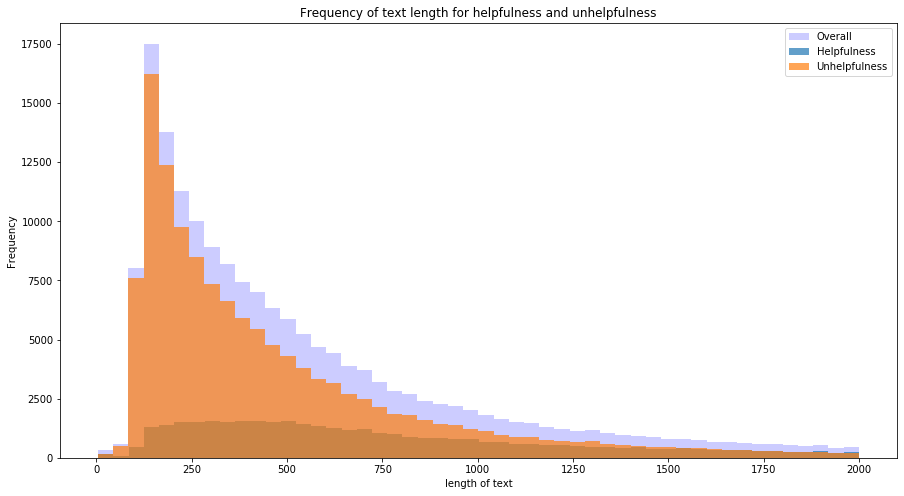

In [97]:
plt.figure(figsize = (15,8))

subset_df1 = data_short[(data_short.neg_feedback>=2) & (data_short.text_len>=2)]


subset_df1.text_len[subset_df1.text_len<2000].plot(bins=50, kind='hist',alpha=0.2,colors='b')
dhelp = subset_df1.text_len[(subset_df1['helpIndx']=='helpful') & (subset_df1.text_len<2000)]
dunhelp = subset_df1.text_len[(subset_df1['helpIndx']=='unhelpful') & (subset_df1.text_len<2000)]

dhelp.plot(bins=50, kind='hist', alpha=0.7)
dunhelp.plot(bins=50, kind='hist',alpha=0.7)

plt.legend(['Overall', 'Helpfulness', 'Unhelpfulness'])
plt.xlabel("length of text")
plt.ylabel("Frequency")
plt.title("Frequency of text length for helpfulness and unhelpfulness")
plt.show()

In [90]:

#data=review_df.copy()
word_count=[]
for s1 in data_short.review_text:
    word_count.append(len(str(s1).split()))

In [93]:
data_short.head(1)

,Rating,asin,brand,categories,description,imUrl,price,related,reviewTime,reviewerID,...,salesRank,title,unixReviewTime,review_text,pos_feedback,neg_feedback,rating_class,help_prop,helpIndx,text_len
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...","02 12, 2014",A1SG50OKAKLR52,...,{'Shoes': 12846},Clarks Women's Grasp Chime Loafer,1392163200,Clarks loafer Grasp chime loafer is a great sh...,0,0,good,0.0,unhelpful,242


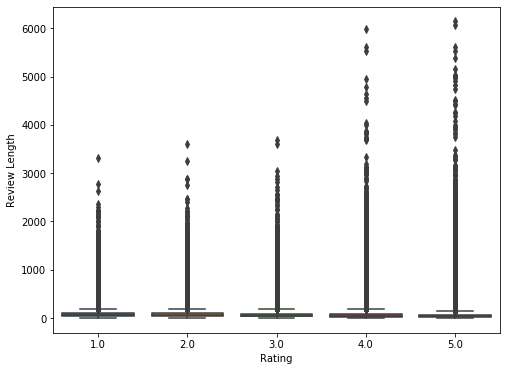

In [94]:

plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Rating",y=word_count,data=data_short)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

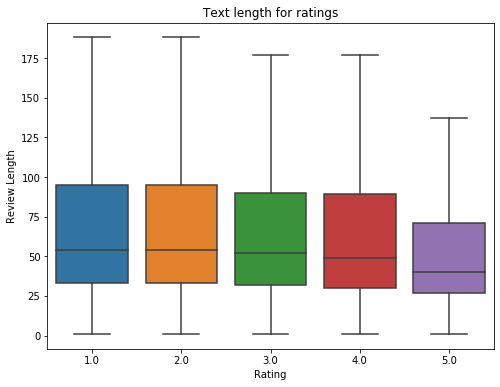

In [99]:

#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="Rating",y=word_count,data=data_short,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title("Text length for ratings")


plt.show()

In [105]:
data_short['reviewTime'] = pd.to_datetime(data_short['reviewTime'])
data_short['year'] = data_short['reviewTime'].dt.year
data_short = data_short.drop('reviewTime', axis = 1)
data_short.head(3)

,Rating,asin,brand,categories,description,imUrl,price,related,reviewerID,reviewerName,...,unixReviewTime,review_text,pos_feedback,neg_feedback,rating_class,help_prop,helpIndx,text_len,rating_class_num,year
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",...,1392163200,Clarks loafer Grasp chime loafer is a great sh...,0,0,good,0.0,unhelpful,242,1,2014
162368,5.0,B00005OL41,Global,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...","High tech from tip to handle, Global knives fr...",http://ecx.images-amazon.com/images/I/41BbNAc5...,99.78,"{'also_bought': ['B000A386PS', 'B00005OL42', '...",AJNU8E5SHV6PQ,"Manuel Antonio Arce Arenales ""MAAA""",...,1317945600,"Great quality, superb product I have become ac...",1,0,good,1.0,helpful,232,1,2011
3501844,1.0,B007IDFQM4,Nostalgia Electrics,"[[Home & Kitchen, Kitchen & Dining, Small Appl...",The nostalgia electrics rim-150 electric ice c...,http://ecx.images-amazon.com/images/I/41K6plJk...,49.99,"{'also_viewed': ['B001CGW338', 'B003FA830G', '...",A1EZLMPWPOOIWT,Mark Mulligan,...,1359590400,a terrible ice cream maker! This ice cream mak...,1,0,bad,1.0,helpful,283,0,2013


In [106]:

data_short['rating_class_num'] = data_short['rating_class'].map({'good': 1, 'bad': 0})
    
feature = data_short.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,1999,21,21,100.000000,0.093645
1,2000,770,686,89.090909,3.059086
2,2001,1698,1428,84.098940,6.367893
3,2002,2702,2188,80.977054,9.756968
4,2003,4308,3380,78.458682,15.072464
5,2004,5652,4240,75.017693,18.907469
6,2005,12001,9232,76.926923,41.168339
7,2006,20779,16695,80.345541,74.448161
8,2007,53777,46058,85.646280,205.386845
9,2008,69862,59286,84.861584,264.374582


<Figure size 864x576 with 0 Axes>

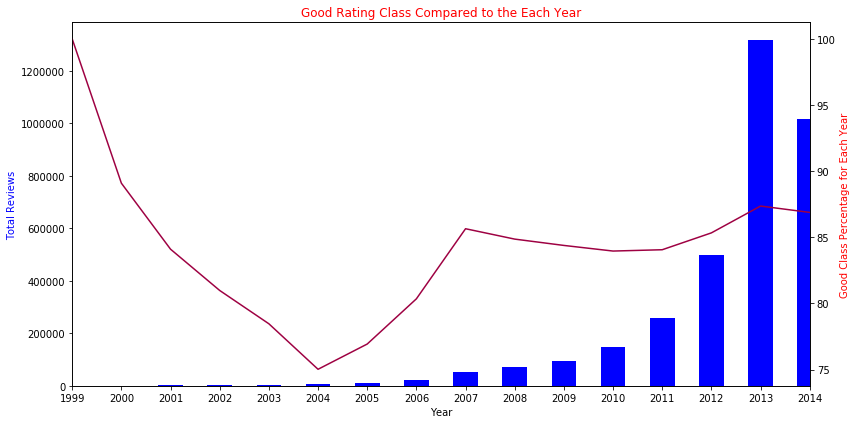

In [107]:

##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

data_short['rating_class_num'] = data_short['rating_class'].map({'good': 1, 'bad': 0})

feature = data_short.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

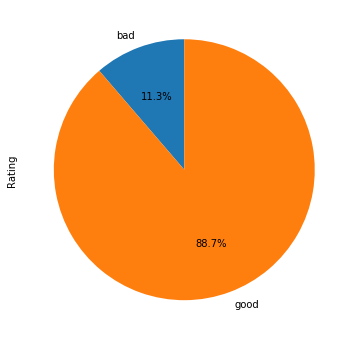

In [137]:

%matplotlib inline
plt.figure(figsize = (10,6))
elec['rating_class'] = elec['Rating'].apply(lambda x: 'bad' if x < 3 else'good')

elec.groupby('rating_class').Rating.count()
elec.groupby('rating_class').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90)

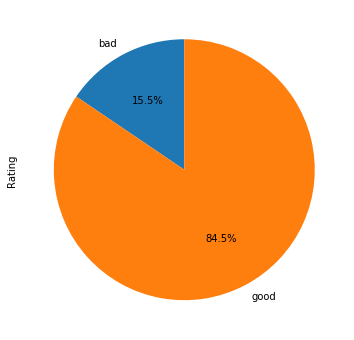

In [138]:

%matplotlib inline
plt.figure(figsize = (10,6))
home['rating_class'] = home['Rating'].apply(lambda x: 'bad' if x < 3 else'good')

home.groupby('rating_class').Rating.count()
home.groupby('rating_class').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90)

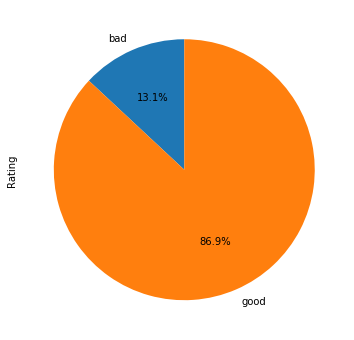

In [139]:

%matplotlib inline
plt.figure(figsize = (10,6))
clothes['rating_class'] = clothes['Rating'].apply(lambda x: 'bad' if x < 3 else'good')

clothes.groupby('rating_class').Rating.count()
clothes.groupby('rating_class').Rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90)

In [151]:
#question 4
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)
countVec.fit(data_short["review_text"])

names = countVec.get_feature_names()

transformed_matrix = countVec.transform(data_short["clean_text"])

transformed_matrix.toarray()




KeyError: 'clean_text'

In [ ]:

# Adding a 'rating' column from previous dataframe's rating value
data_short = pd.DataFrame(transformed_matrix.toarray(), columns=names)
data_short['rating'] = data_short['rating_class_num']

In [ ]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = data_short[data_short[name]== 1]['rating'].mean()
        rating_count = data_short[data_short[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [114]:

elec['type']="elec"
home['type']="home"
clothes['type']="clothes"

data_short_new=pd.concat([elec,home,clothes])

In [116]:
data_short_new=data_short_new.sample(frac=0.3, replace=False, random_state=1)

In [122]:
data_short_new['review_text'] = data_short_new[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
data_short_new = data_short_new.drop(['reviewText', 'summary'], axis = 1)


,Rating,asin,brand,categories,description,imUrl,price,related,reviewTime,reviewerID,reviewerName,salesRank,title,type,unixReviewTime,pos_feedback,neg_feedback,rating_class,review_text
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...","02 12, 2014",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",{'Shoes': 12846},Clarks Women's Grasp Chime Loafer,clothes,1392163200,0,0,good,Clarks loafer Grasp chime loafer is a great sh...


In [124]:
## Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end
##########################################



# list_positive = []
# list_negative = []

# for help in data_short_new['helpful']:
#     list_positive.append(help[0])
#     list_negative.append(help[1] - help[0])
    
# # Positive Feedback (Supporting reviewer's idea and find it useful)
# data_short_new['pos_feedback'] = list_positive

# # Negative Feedback (Finding reviewer's idea useless and not supporting it)
# data_short_new['neg_feedback'] = list_negative

# # Drop redundant 'helpful' column



# ## Classify ratings as good


good_rate = len(data_short_new[data_short_new['Rating'] >= 3])
bad_rate = len(data_short_new[data_short_new['Rating'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for electronic products'.format(good_rate))
print ('Bad ratings : {} reviews for electronic products'.format(bad_rate))


data_short_new['rating_class'] = data_short_new['Rating'].apply(lambda x: 'bad' if x < 3 else'good')

data_short_new['text_len'] = data_short_new.review_text.apply(len)



Good ratings : 3026183 reviews for electronic products
Bad ratings : 481427 reviews for electronic products


In [119]:
data_short_new

,Rating,asin,brand,categories,description,imUrl,price,related,reviewText,reviewTime,reviewerID,reviewerName,salesRank,summary,title,type,unixReviewTime,pos_feedback,neg_feedback,rating_class
4722120,4.0,B00ATY2Z0K,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/418CtEDZ...,NaN,"{'also_bought': ['B004HI2E6Y', 'B00ARSAOM4', '...",Grasp chime loafer is a great shoe. This shoe ...,"02 12, 2014",A1SG50OKAKLR52,"Jeanette A. Dickinson ""justpooh40""",{'Shoes': 12846},Clarks loafer,Clarks Women's Grasp Chime Loafer,clothes,1392163200,0,0,good
162368,5.0,B00005OL41,Global,"[[Home & Kitchen, Kitchen & Dining, Kitchen Kn...","High tech from tip to handle, Global knives fr...",http://ecx.images-amazon.com/images/I/41BbNAc5...,99.78,"{'also_bought': ['B000A386PS', 'B00005OL42', '...",I have become accustomed to expect the best fr...,"10 7, 2011",AJNU8E5SHV6PQ,"Manuel Antonio Arce Arenales ""MAAA""",{'Kitchen & Dining': 9333},"Great quality, superb product","Global G-21 - 6 1/4 inch, 16cm Flexible Boning...",home,1317945600,1,0,good
3501844,1.0,B007IDFQM4,Nostalgia Electrics,"[[Home & Kitchen, Kitchen & Dining, Small Appl...",The nostalgia electrics rim-150 electric ice c...,http://ecx.images-amazon.com/images/I/41K6plJk...,49.99,"{'also_viewed': ['B001CGW338', 'B003FA830G', '...",This ice cream maker does not work at all. Fol...,"01 31, 2013",A1EZLMPWPOOIWT,Mark Mulligan,{'Kitchen & Dining': 210848},a terrible ice cream maker!,Nostalgia Electrics RIM-150 Electric Ice Cream...,home,1359590400,1,0,bad
2552382,4.0,B004M6XUI2,NaN,"[[Clothing, Shoes & Jewelry, Men, Accessories,...",NaN,http://ecx.images-amazon.com/images/I/41ynIB6v...,12.99,"{'also_bought': ['B00JOTTZC2', 'B00D7WFKRQ', '...",if you want to look fashion and nice this wall...,"12 25, 2012",AD0XGI18N5X4G,Oksana Lomidze,{'Clothing': 97},good present,Alpine Swiss Men's Leather Bifold Wallet Remov...,clothes,1356393600,0,0,good
3859902,3.0,B007Z54O1Y,NaN,"[[Clothing, Shoes & Jewelry, Women, Clothing, ...",NaN,http://ecx.images-amazon.com/images/I/41s4%2Ba...,NaN,"{'also_bought': ['B00KRZB1ZQ', 'B00DDQWTD4', '...",These briefs are very feminine and when I wear...,"01 5, 2014",A2CSUB7QR3IMV3,E. Adkins,{'Clothing': 26737},Feminine but sturdy,Bali Women's Shapewear Firm Control Lace 'N Sm...,clothes,1388880000,1,1,good
3540934,5.0,B007R900WA,NaN,"[[Home & Kitchen, Kitchen & Dining, Storage & ...",The enhanced design to save up to 36 k-cup cof...,http://ecx.images-amazon.com/images/I/41H%2Bn5...,23.97,"{'also_bought': ['B00AWLBE6G', 'B00AQ9NI36', '...",Great product. Fits perfectly and well-made. ...,"12 29, 2013",A19P7HBVTPRCB6,Mrs. Karen E. Simmons,{'Kitchen & Dining': 180},Storage drawer for K-cups was exactly what I w...,DecoBros K-cup Storage Drawer Holder for Keuri...,home,1388275200,0,0,good
3078447,4.0,B0050QRSG8,NaN,"[[Home & Kitchen, Kitchen & Dining, Bakeware, ...",From adorning birthday cakes to themed celebra...,http://ecx.images-amazon.com/images/I/517%2Bar...,5.95,"{'also_bought': ['B008S2V63C', 'B0050QRCCI', '...",The only thing I didn't like about these littl...,"06 3, 2012",A19S5O0VQ9ZC4L,Carol D,{'Kitchen & Dining': 62661},Mini carousels,Circus Carousel Cake Topper - Pink (2 Count),home,1338681600,0,0,good
3277554,4.0,B00601VCB4,NaN,"[[Clothing, Shoes & Jewelry, Shoes & Accessori...",NaN,http://ecx.images-amazon.com/images/I/51ZqsaT1...,NaN,"{'also_bought': ['B005GYBBNA', 'B005GYH7H4'], ...",great shoes. My daughter loved them. They are ...,"01 7, 2013",A64DH1TMXQF2V,Charlene Heath,{'Shoes': 220935},beautiful product better than shown,Kenneth Cole Reaction Giggle Ur Toes Gladiator...,clothes,1357516800,0,0,good
4226793,5.0,B00I8PTC1W,NaN,"[[Home & Kitchen, Artwork, Posters & Prints]]",(30x30) Nintendo - Bowser Peel & Stick Giant W...,http://ecx.images-amazon.com/images/I/41XDbhZ-...,32.99,NaN,Nice,"07 2, 2014",A36KPR8N1WCHNI,Pam C. Hess,{'Home &amp; Kitchen': 2620213},Five Stars,(30x30) Nintendo - Bowser Peel &amp; Stick

In [125]:
#data=review_df.copy()
word_count=[]
for s1 in data_short_new.review_text:
    word_count.append(len(str(s1).split()))

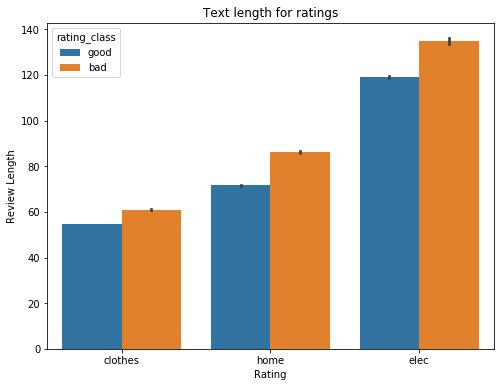

In [130]:

#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.barplot(x="type",y=word_count,data=data_short_new,hue='rating_class')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.title("Text length for ratings")


plt.show()

In [ ]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in elec['review_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])